In [6]:
!pip install nltk
!pip install seaborn

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.9 MB/s eta 0:00:00


In [78]:
from collections import Counter
import matplotlib.pyplot as plt 
import nltk
import string 
import seaborn as sns
from scipy.stats import linregress
import numpy as np 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [108]:
def distribution(path, topk):
    with open(f'./data/{path}') as f:
        data = f.read().lower()
        translator = str.maketrans('', '', string.punctuation + string.digits + '\n')
        data = data.translate(translator)
        tokens = word_tokenize(data)
        
        c = Counter(tokens)
        words = [word for word, _ in c.most_common()]
        freqs = [freq for _, freq in c.most_common()]

        ranks = np.log(np.arange(1, len(words)+1))

        slope, intercept, r_value, _, _ = linregress(ranks, np.log(freqs))
        alpha = -slope
        C = np.exp(intercept)

        print(f"Estimated alpha: {alpha:.4f}")
        print(f"Estimated C: {C:.2f}")
        print(f"R-squared: {r_value**2:.4f}")

        fitted_freqs = C * np.exp(ranks) ** (-alpha)
        plt.plot(ranks, fitted_freqs, color='red', linewidth=2)
        # plt.xscale('log')
        # plt.yscale('log')

        plt.figure(figsize=(18,8))
        sns.barplot(x=words[:topk], y=freqs[:topk], palette="magma")
        plt.xticks(fontsize=8)
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title(f'Top 30 words in {path}')
        plt.show()

Estimated alpha: 0.9138
Estimated C: 848.02
R-squared: 0.9546


C:\Users\rohit\AppData\Local\Temp\ipykernel_6080\2571067227.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words[:topk], y=freqs[:topk], palette="magma")


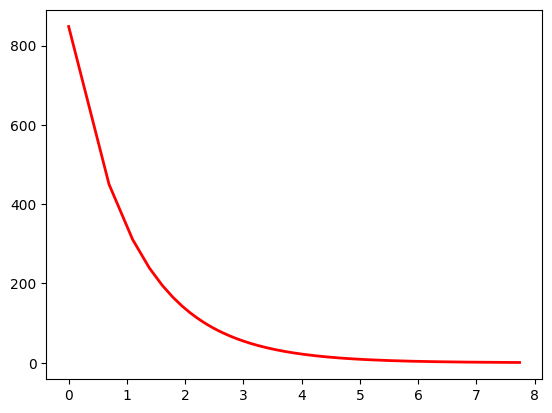

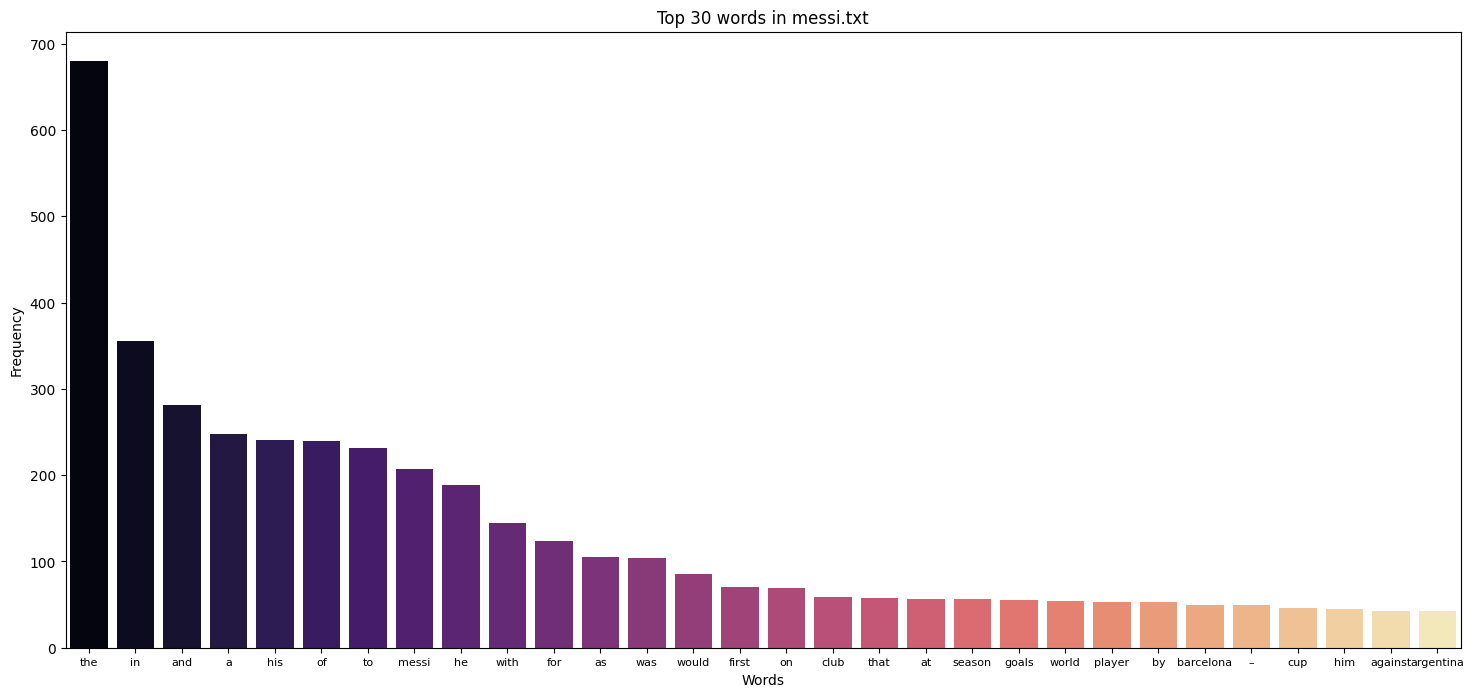

In [109]:
distribution('messi.txt', 30)